In [1]:
from fis_extension import FISIntegration, FISClassifier
from pycaret.classification import *

In [2]:
# the fuzzy integration
fis_integration = FISIntegration()

In [3]:
# load and prepare the data
fis_integration.load_and_prepare_data()

In [4]:
# define fuzzy variables, membership functions and rule base
fis_integration.setup_fis()

In [5]:
# get the data from the integration object
data_for_pycaret = fis_integration.X.copy()
data_for_pycaret['sepsis_icd'] = fis_integration.y  

In [6]:
# Initialize PyCaret
s = setup(
    data=data_for_pycaret,
    target='sepsis_icd',
    session_id=42,
    preprocess=False  
)

,Description,Value
0,Session id,42
1,Target,sepsis_icd
2,Target type,Binary
3,Original data shape,"(500, 6)"
4,Transformed data shape,"(500, 6)"
5,Transformed train set shape,"(350, 6)"
6,Transformed test set shape,"(150, 6)"
7,Numeric features,5


In [7]:
# Create a FISClassifier so it behaves like a regular scikit-learn model inside PyCaret
fis_classifier = FISClassifier(fis_integration=fis_integration)

In [8]:
# Create model
fis_model = create_model(fis_classifier, cross_validation = False, return_train_score = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.6867,0.7555,0.7733,0.6591,0.7117,0.3733,0.3791
Train,0.7257,0.7592,0.8400,0.6837,0.7538,0.4514,0.4637


In [9]:
# Finalize it and make predictions
final_model = finalize_model(fis_model)
predictions = predict_model(final_model, data=data_for_pycaret)
metrics = pull()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,FISClassifier,0.7140,0.7573,0.8200,0.6766,0.7414,0.4280,0.4380


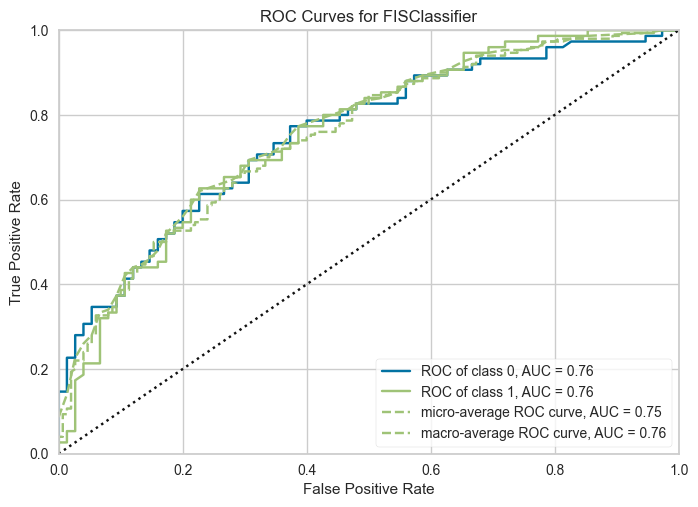

In [10]:
plot_model(fis_model, plot = 'auc')

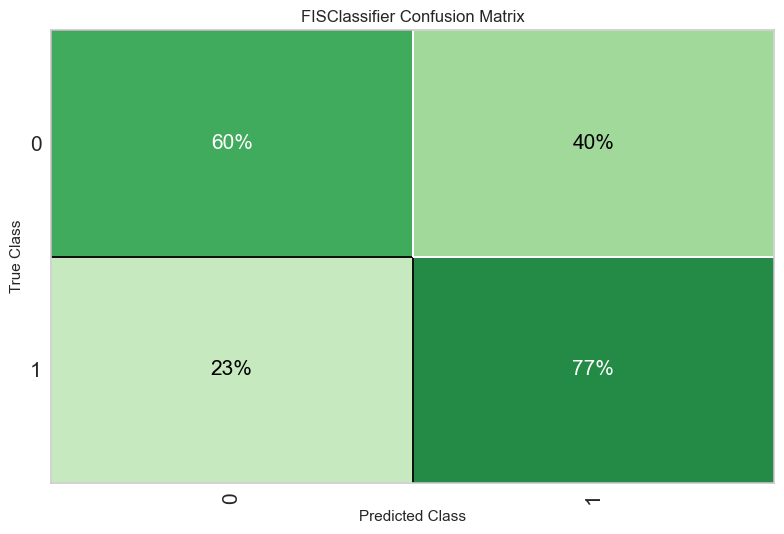

In [11]:
plot_model(fis_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [12]:
fis_integration.run_inference()

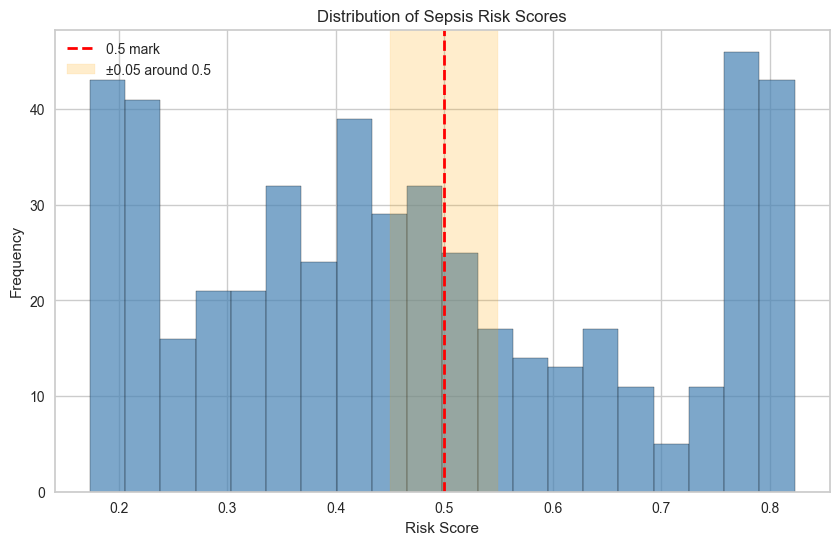

Percentage of risk scores close to 0.5: 16.60%
Confusion Matrix:
[[152  98]
 [ 45 205]]


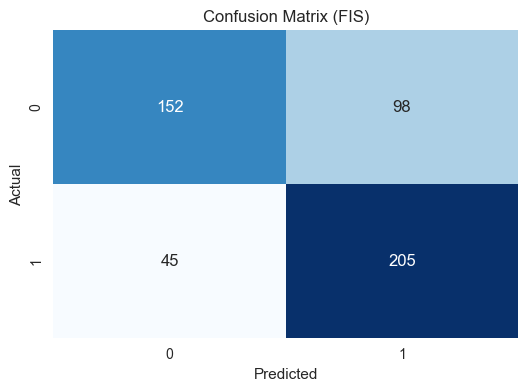

Accuracy:  0.7140
Precision: 0.6766
Recall:    0.8200
F1-Score:  0.7414
TPR:       0.8200
TNR:       0.6080
FPR:       0.3920
FNR:       0.1800


In [13]:
fis_integration.evaluate_results()

In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7400,0.8137,0.7235,0.7563,0.7334,0.4781,0.4864,0.2610
ridge,Ridge Classifier,0.7371,0.8144,0.7121,0.7569,0.7282,0.4723,0.4796,0.0030
lda,Linear Discriminant Analysis,0.7371,0.8144,0.7121,0.7569,0.7282,0.4723,0.4796,0.0050
nb,Naive Bayes,0.7229,0.8065,0.6951,0.7473,0.7122,0.4438,0.4552,0.0040
qda,Quadratic Discriminant Analysis,0.7229,0.7931,0.6722,0.7643,0.7073,0.4436,0.4555,0.0040
gbc,Gradient Boosting Classifier,0.6943,0.7699,0.6964,0.7045,0.6938,0.3869,0.3942,0.0180
ada,Ada Boost Classifier,0.6829,0.7520,0.6843,0.6877,0.6814,0.3635,0.3679,0.0130
lightgbm,Light Gradient Boosting Machine,0.6800,0.7507,0.6961,0.6771,0.6832,0.3581,0.3620,0.0250
rf,Random Forest Classifier,0.6771,0.7781,0.6908,0.6804,0.6798,0.3529,0.3593,0.0260
et,Extra Trees Classifier,0.6771,0.7845,0.6846,0.6804,0.6785,0.3528,0.3574,0.0220


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
best = automl(optimize = 'Recall')
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
